# Titanic - Machine Learning from Disaster

In [1]:
import sys 
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook

print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

Python version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.1
matplotlib version: 3.1.1
NumPy version: 1.16.5
SciPy version: 1.3.1
IPython version: 7.8.0
scikit-learn version: 0.23.2


In [2]:
train_data = pd.read_csv("./Data/train.csv")
test_data = pd.read_csv("./Data/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
data_cleaner = [train_data, test_data]

In [10]:
for df in data_cleaner:
    print(df.isnull().sum())
    print("-"*20)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------


In [11]:
drop_column = ['PassengerId', 'Ticket', 'Cabin']

for df in data_cleaner:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)
    df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
    df.drop(drop_column, axis=1, inplace=True)

In [12]:
for df in data_cleaner:
    print(df.isnull().sum())
    print('-'*20)    

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
--------------------
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
--------------------


In [13]:
for col in train_data:
    if train_data[col].dtype != 'float64' and col not in ['Survived', 'Name']:
        print('Survival correlation by: ', col)
        print(pd.pivot_table(train_data, values=['Survived'], index=[col], aggfunc={'Survived': np.mean}))
        # print(train_data[[col, 'Survived']].groupby(col, as_index=False).mean())
        print('-'*20)

Survival correlation by:  Pclass
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
--------------------
Survival correlation by:  Sex
        Survived
Sex             
female  0.742038
male    0.188908
--------------------
Survival correlation by:  SibSp
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
--------------------
Survival correlation by:  Parch
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
--------------------
Survival correlation by:  Embarked
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009
--------------------


Text(0, 0.5, 'Number of siblings')

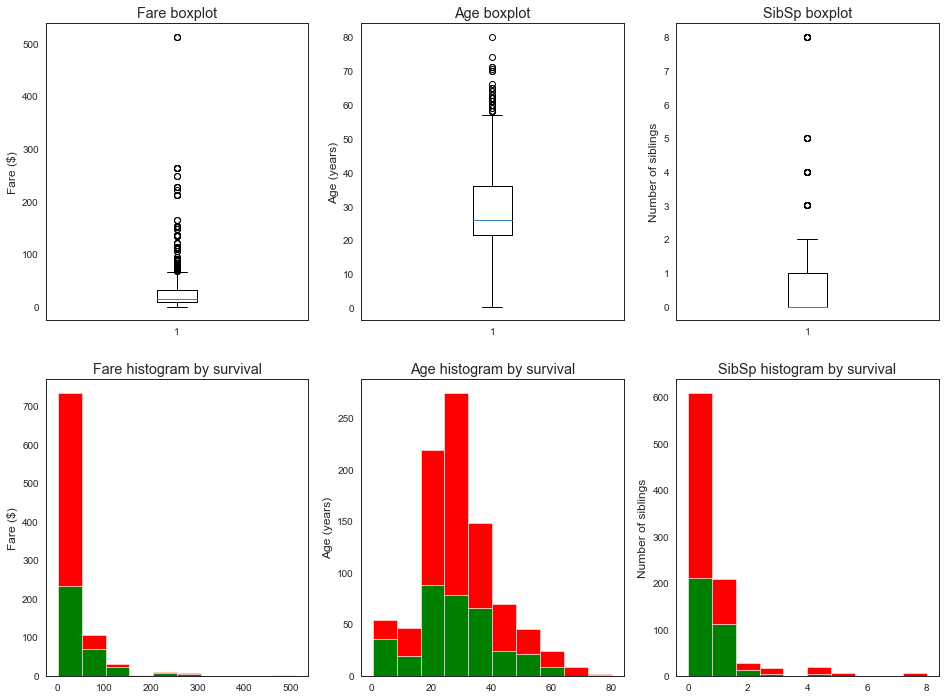

In [14]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=train_data['Fare'])
plt.title('Fare boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(x=train_data['Age'])
plt.title('Age boxplot')
plt.ylabel('Age (years)')

plt.subplot(233)
plt.boxplot(x=train_data['SibSp'])
plt.title('SibSp boxplot')
plt.ylabel('Number of siblings')

plt.subplot(234)
plt.hist(x=[train_data[train_data['Survived'] == 1]['Fare'], train_data[train_data['Survived'] == 0]['Fare']], color=['g', 'r'], stacked=True)
plt.title('Fare histogram by survival')
plt.ylabel('Fare ($)')

plt.subplot(235)
plt.hist(x=[train_data[train_data['Survived'] == 1]['Age'], train_data[train_data['Survived'] == 0]['Age']], color=['g', 'r'], stacked=True)
plt.title('Age histogram by survival')
plt.ylabel('Age (years)')

plt.subplot(236)
plt.hist(x=[train_data[train_data['Survived'] == 1]['SibSp'], train_data[train_data['Survived'] == 0]['SibSp']], color=['g', 'r'], stacked=True)
plt.title('SibSp histogram by survival')
plt.ylabel('Number of siblings')

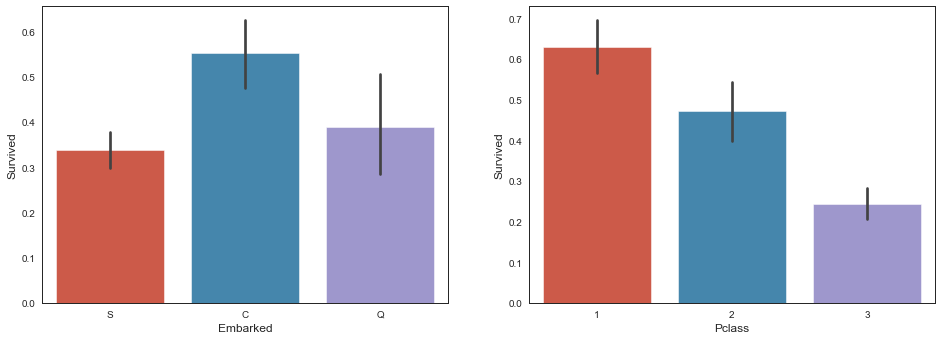

In [15]:
plt.figure(figsize=[16, 12])

plt.subplot(221)
sns.barplot(x = 'Embarked', y = 'Survived', data=train_data)

plt.subplot(222)
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train_data)
# sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=train_data, ax = saxis[0,2])

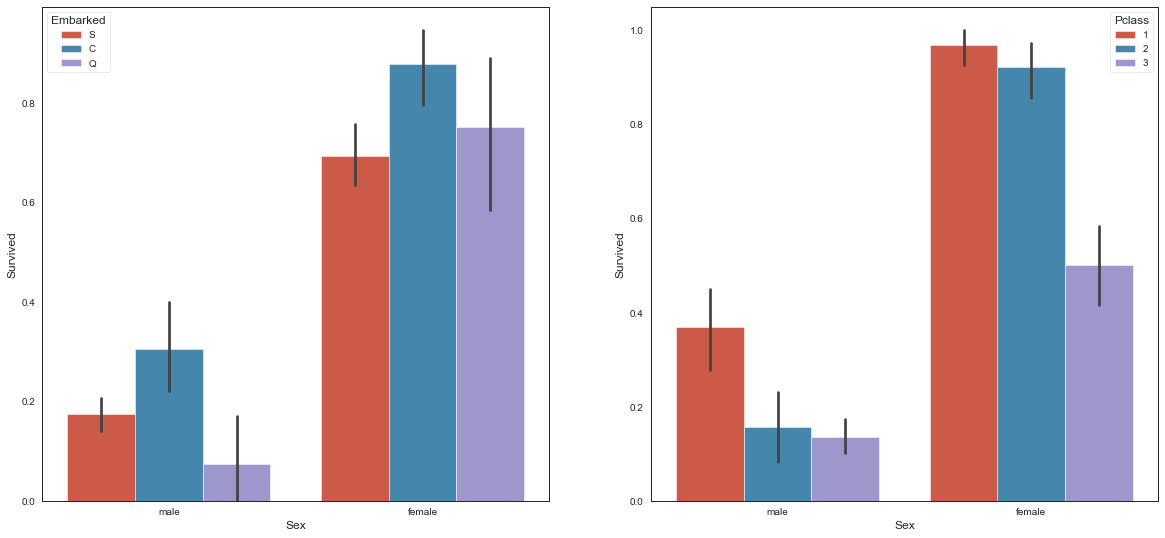

In [16]:
plt.figure(figsize=[20, 20])

plt.subplot(221)
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=train_data)

plt.subplot(222)
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_data)

In [17]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [18]:
for df in data_cleaner:
    df['Family'] = df['SibSp'] + df['Parch']
    df['IsAlone'] = 1
    df['IsAlone'].loc[df['Family'] == 0] = 0
    
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0
